In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import praw

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# reddit = praw.Reddit(client_id= redacted,
#                      client_secret= redacted,
#                     username = redacted,
#                     password = redacted,
#                     user_agent=redacted)

# nba = reddit.subreddit('nba')
# nfl = reddit.subreddit('nfl')
# soccer = reddit.subreddit('soccer')

# def getdata(sub, name):
#     #retrieve top 1000 posts:
#     posts = sub.top(limit=1000)
#     data = [(_.title, _.created_utc, _.score, _.num_comments, _.link_flair_text, name) for _ in posts]
#     return data

# nba_data = getdata(nba, 'NBA')
# nfl_data = getdata(nfl, 'NFL')
# soc_data = getdata(soccer, 'Soccer')

# nbadf = pd.DataFrame(nba_data, columns=['title', 'dateUTC', 'upvotes', 'comments', 'flair', 'subreddit'])
# nfldf = pd.DataFrame(nfl_data, columns=['title', 'dateUTC', 'upvotes', 'comments', 'flair', 'subreddit'])
# socdf = pd.DataFrame(soc_data, columns=['title', 'dateUTC', 'upvotes', 'comments', 'flair', 'subreddit'])
# df = nbadf.append(nfldf)
# df = df.append(socdf)
# df.to_csv('sportsreddits.csv')
# df.groupby('subreddit').agg({'title':'count'})

In [3]:
df = pd.read_csv('sportsreddits.csv')

In [4]:
print(df.shape)
df.head()

(2989, 7)


,Unnamed: 0,title,dateUTC,upvotes,comments,flair,subreddit
0,0,[Withers] LeBron signing with Lakers.,1.530490e+09,53338,9524,"4 years, $154 million",NBA
1,1,LBJ throws it off the backboard to himself,1.528334e+09,47885,2293,LeBron James,NBA
2,2,Derrick Rose is reduced to tears after his tea...,1.541040e+09,45969,2490,Highlights,NBA
3,3,Is Lebron DENNIS systeming the cavs?,1.517529e+09,40405,919,sp,NBA
4,4,LeBron James passes to himself and dunks,1.497063e+09,39502,2328,Highlights,NBA


In [5]:
#Confirm no datatype surprises
for i in df.iloc[0,:]:
    print(type(i))

<class 'numpy.int64'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>


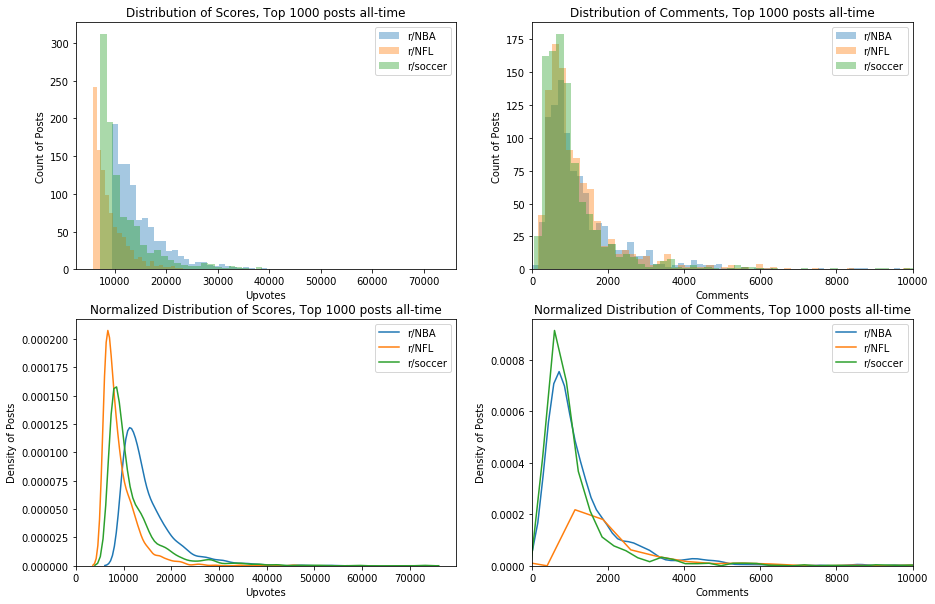

In [6]:
fig = plt.figure(figsize=[15,10])
fig.add_subplot(221)
sns.distplot(df[df.subreddit == 'NBA']['upvotes'], kde=False, hist=True, norm_hist=False, label='r/NBA')
sns.distplot(df[df.subreddit == 'NFL']['upvotes'], kde=False, hist=True,  norm_hist=False, label='r/NFL')
sns.distplot(df[df.subreddit == 'Soccer']['upvotes'], kde=False, hist=True, norm_hist=False, label='r/soccer')
plt.legend()
plt.xlabel('Upvotes')
plt.ylabel('Count of Posts')
plt.title('Distribution of Scores, Top 1000 posts all-time')
fig.add_subplot(222)
sns.distplot(df[df.subreddit == 'NBA']['comments'], bins=100,
             kde=False, hist=True, norm_hist=False, label='r/NBA')
sns.distplot(df[df.subreddit == 'NFL']['comments'], bins=500,
             kde=False, hist=True, norm_hist=False, label='r/NFL')
sns.distplot(df[df.subreddit == 'Soccer']['comments'], bins=200,
             kde=False, hist=True, norm_hist=False, label='r/soccer')
plt.legend()
plt.xlabel('Comments')
plt.ylabel('Count of Posts')
plt.title('Distribution of Comments, Top 1000 posts all-time')
plt.xlim([0,10000])
fig.add_subplot(223)
sns.distplot(df[df.subreddit == 'NBA']['upvotes'], hist=False, label='r/NBA')
sns.distplot(df[df.subreddit == 'NFL']['upvotes'], hist=False, label='r/NFL')
sns.distplot(df[df.subreddit == 'Soccer']['upvotes'], hist=False, label='r/soccer')
plt.legend()
plt.xlabel('Upvotes')
plt.ylabel('Density of Posts')
plt.title('Normalized Distribution of Scores, Top 1000 posts all-time')
fig.add_subplot(224)
sns.distplot(df[df.subreddit == 'NBA']['comments'], hist=False, label='r/NBA')
sns.distplot(df[df.subreddit == 'NFL']['comments'], hist=False, label='r/NFL')
sns.distplot(df[df.subreddit == 'Soccer']['comments'], hist=False, label='r/soccer')
plt.legend()
plt.xlabel('Comments')
plt.ylabel('Density of Posts')
plt.title('Normalized Distribution of Comments, Top 1000 posts all-time')
plt.xlim([0,10000])
plt.show()

In [7]:
#Most common threads by sport:
print('NBA')
display(df[df.subreddit=='NBA'].groupby(['flair'])['comments'].agg('count').sort_values(ascending=False)[:5])
print('NFL')
display(df[df.subreddit=='NFL'].groupby(['flair'])['comments'].agg('count').sort_values(ascending=False)[:5])
print('Soccer')
display(df[df.subreddit=='Soccer'].groupby(['flair'])['comments'].agg('count').sort_values(ascending=False)[:5])

NBA


flair
Highlights          363
National Writer      38
Post Game Thread     23
sp                   22
Beat Writer          18
Name: comments, dtype: int64

NFL


flair
Highlights       83
Breaking News    55
Roster Move      51
Rumor            46
Serious          22
Name: comments, dtype: int64

Soccer


flair
Media                 425
Verified account       98
Official source        97
Unverified account     30
Mirror in comments     11
Name: comments, dtype: int64

In [8]:
#Date Parsing
df['datet'] = [datetime.datetime.utcfromtimestamp(x) for x in df['dateUTC']]
df['year'] = [x.year for x in df['datet']]
df['month'] = [x.month for x in df['datet']]
df['week'] = [x.week for x in df['datet']]
df.head()

,Unnamed: 0,title,dateUTC,upvotes,comments,flair,subreddit,datet,year,month,week
0,0,[Withers] LeBron signing with Lakers.,1.530490e+09,53338,9524,"4 years, $154 million",NBA,2018-07-02 00:07:01,2018,7,27
1,1,LBJ throws it off the backboard to himself,1.528334e+09,47885,2293,LeBron James,NBA,2018-06-07 01:16:15,2018,6,23
2,2,Derrick Rose is reduced to tears after his tea...,1.541040e+09,45969,2490,Highlights,NBA,2018-11-01 02:36:14,2018,11,44
3,3,Is Lebron DENNIS systeming the cavs?,1.517529e+09,40405,919,sp,NBA,2018-02-01 23:56:46,2018,2,5
4,4,LeBron James passes to himself and dunks,1.497063e+09,39502,2328,Highlights,NBA,2017-06-10 02:53:17,2017,6,23


In [49]:
#This fixes an outlier that the datetime package is somehow placing in week 53
df['week'] = np.where(df['week']>52,52,df.week)
#group by weeks for plotting
nbaweeks = df[df.subreddit == 'NBA'].groupby('week')['comments'].mean()
nflweeks = df[df.subreddit == 'NFL'].groupby('week')['comments'].mean()
socweeks = df[df.subreddit == 'Soccer'].groupby('week')['comments'].mean()

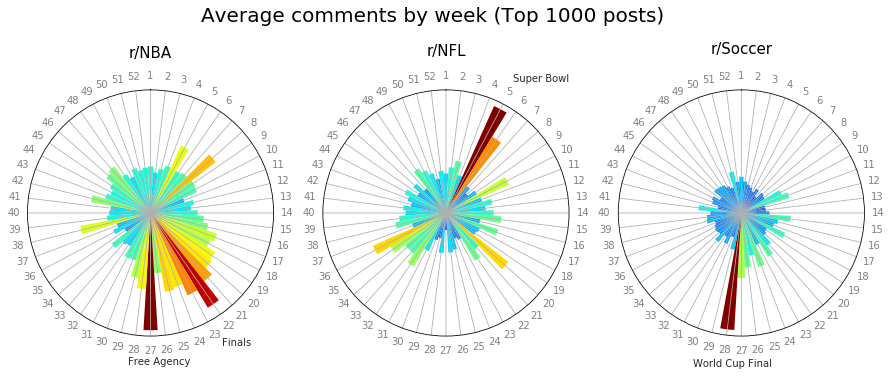

In [86]:
fig= plt.figure(figsize=[15,6])
fig.suptitle('Average comments by week (Top 1000 posts)',
            size=20)
#Plot NBA first
ax = plt.subplot(131, polar=True)
plt.text(0, 3600, 'r/NBA',
         horizontalalignment='center',
         fontsize=15)
#how many periods to plot
N = len(nbaweeks)
bottom = 0
max_height = 4
radii = nbaweeks
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
width = (2*np.pi) / N
#create the bars
bars = ax.bar(theta, radii, width=width, bottom=bottom)
#ensure it goes clockwise
ax.set_theta_direction(-1)
# Angles will be the xticks
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
plt.xticks(angles[:-1], radii.index, color='grey', size=10)
plt.yticks([])
#ensure the first week is on top. 1.5708 is 90 degrees in radians.
ax.set_theta_offset(1.5708)

# Use custom colors to indicate high activity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / max(radii)))

#Manually annotate peaks
plt.annotate('Free Agency', xy=(theta[27],radii[27]),
            xytext=(-8, -35),textcoords='offset points',
            horizontalalignment='left',color='#282828')
plt.annotate('Finals', xy=(theta[22],radii[22]),
            xytext=(20, -35), textcoords='offset points',
            horizontalalignment='left',color='#282828')
################################
#Plot NFL next
ax = plt.subplot(132, polar=True)
plt.text(0, 4500, 'r/NFL',
         horizontalalignment='center',
         fontsize=15)
#how many periods to plot
N = len(nflweeks)
bottom = 0
max_height = 4
radii = nflweeks
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
width = (2*np.pi) / N
#create the bars
bars = ax.bar(theta, radii, width=width, bottom=bottom)
#ensure it goes clockwise
ax.set_theta_direction(-1)
# Angles will be the xticks
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
plt.xticks(angles[:-1], radii.index, color='grey', size=10)
plt.yticks([])
#ensure the first week is on top. 1.5708 is 90 degrees in radians.
ax.set_theta_offset(1.5708)

# Use custom colors to indicate high activity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / max(radii)))
plt.annotate('Super Bowl', xy=(theta[5],radii[5]),
            xytext=(0, 35), textcoords='offset points',
            horizontalalignment='left',color='#282828')
    
################################
#Soccer is 3rd
ax = plt.subplot(133, polar=True)
plt.text(0, 4600, 'r/Soccer',
         horizontalalignment='center',
         fontsize=15)
#how many periods to plot
N = len(socweeks)
bottom = 0
max_height = 4
radii = socweeks
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
width = (2*np.pi) / N
#create the bars
bars = ax.bar(theta, radii, width=width, bottom=bottom)
#ensure it goes clockwise
ax.set_theta_direction(-1)
# Angles will be the xticks
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
plt.xticks(angles[:-1], radii.index, color='grey', size=10)
plt.yticks([])
#ensure the first week is on top. 1.5708 is 90 degrees in radians.
ax.set_theta_offset(1.5708)

# Use custom colors to indicate high activity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / max(radii)))
plt.annotate('World Cup Final', xy=(theta[28],radii[28]),
            xytext=(-20, -40), textcoords='offset points',
            horizontalalignment='left',color='#282828')
plt.show()